1)jeśli sieć ma np 200 neuronów, ale my wybierzemy do naszego modelu niecały, np tylko 100 wejściowych, może to doprowadić do tego że ona sie nauczy w sposób nietypowy. Np jeden neuron wyspecjalizuje sie w wykrywaniu jednego konkretnego elementu/ zależności.

My byśmy chcieli, zmusić sieć do generalizowania, tak aby nie e=jeden neuron rozpoznawał rozalię, a cała sieć.

2) Dropout(0.2) (20%) tzn sieć pomija losowo wybrane 20% wag - połączeń. Tzn ona nie bierze ich pod uwagę

3) dzięki temu, że te połączenia w każdej iteracji będą sie zmieniać i przeplatać. unikniemy problemu że jeden neuon wprost się nauczy całej cechy.

= wprowadzenie dropautu sprawia, że przeuczenie jest mniejsze

In [10]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import os 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
EPOCHS = 20

#wczytanie danych 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Wczytaj zbiór MNIST i znormalizuj dane (jak na poprzednich zajęciach) - podziel na 255
# Stwórz dwa modele. Każdy z nich powinien mieć jedną warstwę ukrytą o 256 neuronach. 
# Różnica polega na dołączeniu w jednym z nich warstwy Dropout zaraz po 
# warstwie ukrytej - Dropout(0.2).
# Wytrenuj oba modele
# Stórz wykresy porównujące val_acc i acc obu modeli

In [3]:
# normalizacja danych
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

- flatten zamienia nam dwuwymiarowy 28x28 na jedno (784)

- funkcje straty w tenorflow
    jeśli label to cyfry, np od 0-9 i przykładowy label wygląda np [7]
    to kożystamy ze 'sparse_categorical_crossentropy' i wtedy funkcja aktywacji w ostatniej 
    warstwie musi być softmax
    
    categorical crossentropy
    jeśli są w formie np [0,0,0,0,0,0,1,0,0] czyli tam gdzie jest jedynka pojawia się kolejny label.
    Tu funkcją aktywacji będzie: softmax
        
    binary
    label jest w formie 1 lub 0, np [0] o wtedy
    funkcją aktywacji będzie signoid

In [7]:
# no dropout
nodrop = Sequential()
nodrop.add(Flatten(input_shape=(28,28)))
nodrop.add(Dense(256, activation = 'relu'))
nodrop.add(Dense(10, activation = 'softmax'))

nodrop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

nodrop.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history_nodrop = nodrop.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_test, y_test), callbacks = [es])
hist = pd.DataFrame(history_nodrop.history)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 5.0816 - accuracy: 0.9886 - val_loss: 20.3772 - val_accuracy: 0.9746
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3116 - accuracy: 0.9936 - val_loss: 18.9933 - val_accuracy: 0.9771
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3051 - accuracy: 0.9935 - val_loss: 19.5233 - val_accuracy: 0.9729
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2641 - accuracy: 0.9936 - val_loss: 17.7665 - val_accuracy: 0.9775
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8602 - accuracy: 0.9945 - val_loss: 15.8304 - val_accuracy: 0.9781
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8641 - accuracy: 0.9946 - val_loss: 18.8355 - val_accuracy: 0.9757
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6654 - accuracy: 0.9950 - val_loss: 18.8095 - val_ac

In [12]:
# dropout
drop = Sequential()
drop.add(Flatten(input_shape=(28,28)))
drop.add(Dense(256, activation = 'relu'))
drop.add(Dropout(0.2))
drop.add(Dense(10, activation = 'softmax'))

drop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

drop.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
history_drop = nodrop.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_test, y_test), callbacks = [es])
hist_drop = pd.DataFrame(history_drop.history)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4892 - accuracy: 0.9954 - val_loss: 23.3500 - val_accuracy: 0.9740
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4132 - accuracy: 0.9956 - val_loss: 21.4480 - val_accuracy: 0.9769
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6118 - accuracy: 0.9953 - val_loss: 18.3303 - val_accuracy: 0.9781
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4878 - accuracy: 0.9958 - val_loss: 17.5953 - val_accuracy: 0.9788
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2278 - accuracy: 0.9959 - val_loss: 20.5573 - val_accuracy: 0.9781
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5508 - accuracy: 0.9959 - val_loss: 17.8531 - val_accuracy: 0.9775
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2430 - accuracy: 0.9965 - val_loss: 20.0140 - val_ac

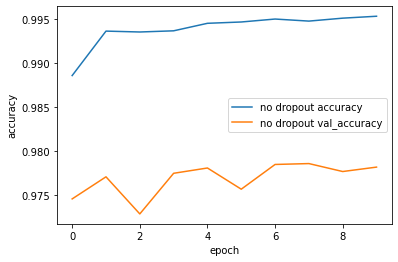

In [19]:
plt.plot()
plt.plot(hist.accuracy, label = "no dropout accuracy")
plt.plot(hist.val_accuracy, label = "no dropout val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")


plt.legend()

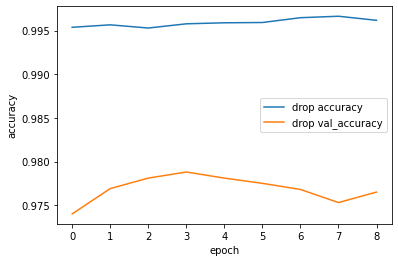

In [18]:
plt.plot()
plt.plot(hist_drop.accuracy, label = "drop accuracy")
plt.plot(hist_drop.val_accuracy, label = "drop val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")


plt.legend()

In [ ]:
# mniejsza różnica = mniejsze przeuczenie